## data  ingetion

In [1]:
import  pandas as  pd
import numpy as  np


In [2]:
import seaborn as  sns
import  matplotlib.pyplot as  plt

In [3]:
df  =  pd.read_csv(r"C:\Users\admin\Downloads\50_Startups.csv")

### Basic checks  

In [4]:
df.head()   #  top  5 rows

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.columns  #  checking all columns name

Index(['RND', 'ADMIN', 'MKT', 'STATE', 'PROFIT'], dtype='object')

In [6]:
df.info()   #  checking info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.isnull().sum() #  finding count  of  missing value  for each column 

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

<Axes: xlabel='RND', ylabel='PROFIT'>

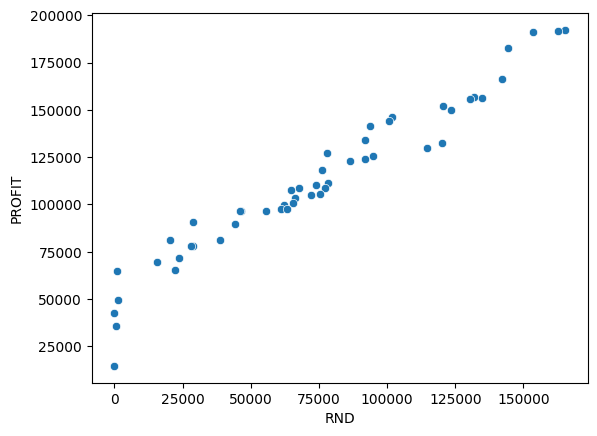

In [8]:
sns.scatterplot(df  ,  x  =  'RND' , y  = 'PROFIT' )

In [9]:
df['RND'].corr(df['PROFIT'])

np.float64(0.9729004656594832)

<Axes: xlabel='MKT', ylabel='PROFIT'>

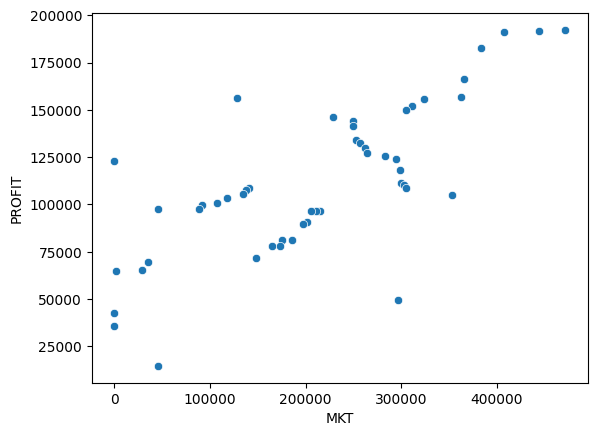

In [10]:
sns.scatterplot(df  ,  x  =  'MKT' , y  = 'PROFIT' )

In [11]:
df['MKT'].corr(df['PROFIT'])

np.float64(0.7477657217414767)

<Axes: xlabel='ADMIN', ylabel='PROFIT'>

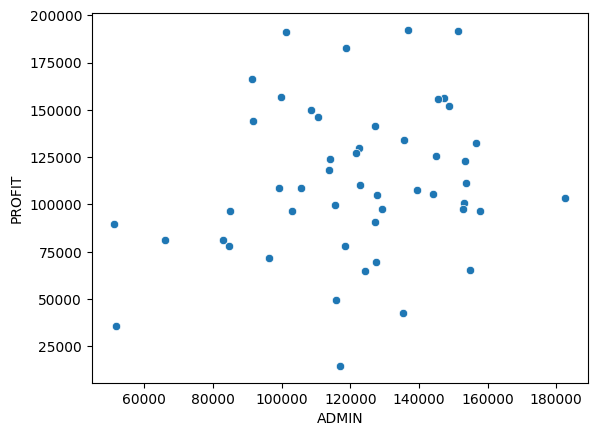

In [12]:
sns.scatterplot(df  ,  x  =  'ADMIN' , y  = 'PROFIT' )

In [13]:
df['PROFIT'].corr(df['ADMIN'])

np.float64(0.20071656826872125)

### fit  line  between RND & PRofit 
profit  =  m*RND+c

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model  =  LinearRegression()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train  , x_test , y_train  , y_test  =  train_test_split(df['RND'] ,  df['PROFIT'] ,  test_size  = 0.2 , random_state= 3)

In [18]:
x_train.head()

36     28663.76
23     67532.53
37     44069.95
18     91749.16
4     142107.34
Name: RND, dtype: float64

In [19]:
x_test.head()

12     93863.75
39     38558.51
9     123334.88
47         0.00
31     61136.38
Name: RND, dtype: float64

In [24]:
print(x_train.shape , x_test.shape)

print( y_train.shape , y_test.shape  )

(40,) (10,)
(40,) (10,)


In [ ]:
x_train  =  pd.DataFrame(x_train)
x_test   =  pd.DataFrame(x_test)
y_train  =  pd.DataFrame(y_train)
y_test   =  pd.DataFrame(y_test)

In [27]:
model.fit(x_train  ,  y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### model  evaluation

In [28]:
model.score(x_train  , y_train)

0.9421735776559492

In [29]:
model.score(x_test ,  y_test)

0.956549813180969

In [30]:
#  find  value of slope
model.coef_

array([[0.8521142]])

In [31]:
#  find  valur  of  intercept
model.intercept_

array([49342.17008281])

profit  =  0.8521142*RND + 49342.17008281

In [32]:
#  RND  =  50000
0.8521142*50000 + 49342.17008281

91947.88008281

####  check  MAE  , MSE  , RMSE 

In [33]:
from  sklearn.metrics import (mean_squared_error , 
                               root_mean_squared_error , 
                               mean_absolute_error , 
                               r2_score)

#### prediction  on  training and  testing data

In [34]:
y_train_pred  =  model.predict(x_train)

In [35]:
y_train_pred

array([[ 73766.96694465],
       [106887.59771742],
       [ 86894.80017954],
       [127522.93196625],
       [170433.85212577],
       [104443.88757834],
       [115818.24873788],
       [146929.36416112],
       [102168.54668362],
       [135126.17653147],
       [160371.05661853],
       [ 73844.14292755],
       [110786.07982091],
       [ 88902.48348354],
       [ 50463.09222561],
       [161716.34895078],
       [ 62554.82276496],
       [187893.97880231],
       [ 88551.36982829],
       [180091.85930443],
       [112393.98522782],
       [ 96629.3527766 ],
       [130000.88005381],
       [113530.96972325],
       [151547.5078316 ],
       [105245.53105231],
       [114319.16683519],
       [103373.75996287],
       [ 66580.09093996],
       [ 68240.13721464],
       [ 49342.17008281],
       [ 73110.12323632],
       [136183.75250479],
       [122981.62343299],
       [116138.95043741],
       [190238.57101789],
       [152058.16282813],
       [172363.95043206],
       [1149

In [36]:
print('MSE' , mean_squared_error(y_train  ,  y_train_pred))
print('RMSE' , root_mean_squared_error(y_train  ,  y_train_pred))
print('MAE' , mean_absolute_error(y_train  ,  y_train_pred))
print('R2_score' , r2_score(y_train  ,  y_train_pred))

MSE 87352304.90351331
RMSE 9346.245497712614
MAE 6780.603122038946
R2_score 0.9421735776559492


#### testing  evaluation

In [37]:
y_test_pred  =  model.predict(x_test)

In [38]:
y_test_pred

array([[129324.80412803],
       [ 82198.42390454],
       [154437.57242984],
       [ 49342.17008281],
       [101437.34749038],
       [105625.60806916],
       [127730.19170261],
       [ 49804.0585838 ],
       [ 50194.480267  ],
       [164049.91480864]])

In [39]:
print('MSE' , mean_squared_error(y_test  ,  y_test_pred))
print('RMSE' , root_mean_squared_error(y_test  ,  y_test_pred))
print('MAE' , mean_absolute_error(y_test  ,  y_test_pred))
print('R2_score' , r2_score(y_test  ,  y_test_pred))

MSE 76355032.40673098
RMSE 8738.136666746004
MAE 7457.725927152812
R2_score 0.956549813180969
